In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Define the Sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [3]:
# Loss function : Log likelihood
def compute_loss(y, hx):
    return -np.mean(y * np.log(hx) + (1-y)* np.log(1-hx))

In [ ]:
# Gradient of the loss in Matrix form
# X.T means X transpose
# y.shape[0] means n - number of data points
def compute_gradient(X, y, hx):
    return np.dot(X.T , (hx - y))/ y.shape[0]

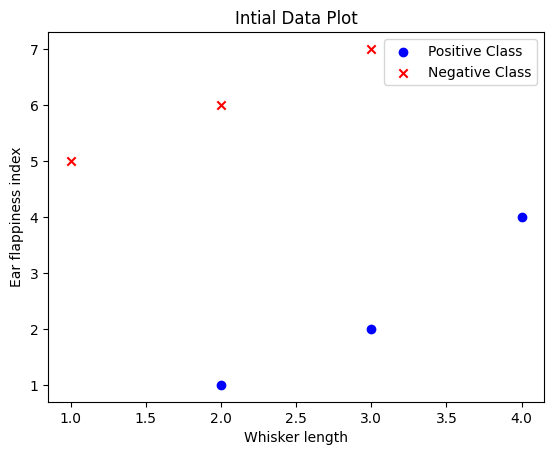

In [5]:
# Dataset
X = np.array([
    [2,1], [3,2], [4, 4],  # Positive Examples
    [1,5], [2, 6], [3, 7]  # Negative Examples
])

y = np.array([1, 1, 1, 0, 0, 0])  # Labels 

# Plot initial data
plt.scatter(X[:3, 0], X[:3, 1], color='blue', marker='o', label='Positive Class')
plt.scatter(X[3:, 0], X[3:, 1], color='red', marker='x', label='Negative Class')
plt.xlabel('Whisker length')
plt.ylabel('Ear flappiness index')
plt.legend()
plt.title('Intial Data Plot')
plt.show()
 

In [ ]:
# Logistic Regression Model
def logistic_regression(X, y, learning_rate=0.01, num_iterations=100):
    # Add intercept term of X
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    # Initialize weights
    weights = np.zeros(X.shape[1])

    # gradient descent
    for i in range(num_iterations):
        z = np.dot(X, weights)
        hx = sigmoid(z) # hypothesis
        loss = compute_loss(y, hx) # Loss function
        gradient = compute_gradient(X, y, hx) # gradient
        weights -=learning_rate * gradient

        if i%10 == 0:
         plot_decision_boundary(X, y , weights, loss, i)
         print(f'Iteration {i}: Theta={weights}, Loss={loss}')
    
    return weights

In [30]:
# Plotting the decision Boundary 
def plot_decision_boundary(X, y, weights, loss, iteration):
  plt.scatter(X[y == 1, 1], X[y == 1, 2], color='blue', marker='o', label='Positive Class' if iteration == 0 else "")
  plt.scatter(X[y == 0, 1], X[y == 0, 2], color='red', marker='x', label='Negative Class' if iteration == 0 else "")

  # Extend the x values a bit beyond the minimum and maximum values of the dataset
  x_values = np.array([np.min(X[:, 1]) - 1,  np.max(X[:, 1]) + 1])
  y_values = -(weights[0] + weights[1] * x_values) / weights[2]
  plt.plot(x_values, y_values, 'k')

  plt.xlim(x_values[0], x_values[1])
  plt.ylim(np.min(X[:, 2]) -1 , np.max(X[:, 2]) + 1 )
  plt.xlabel('Whisker length')
  plt.ylabel('Ear flappiness index')
  plt.title(f'Decision Boundary at iteration {iteration} \nLoss:{loss}')
  if iteration == 0:
    plt.legend()
  plt.show()
  


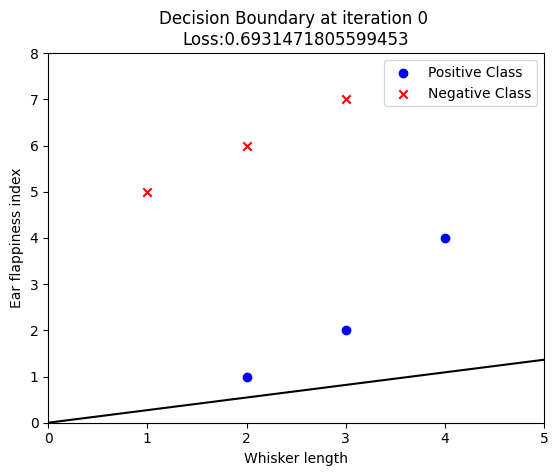

Iteration 0: Theta=[ 0.          0.025      -0.09166667], Loss=0.6931471805599453


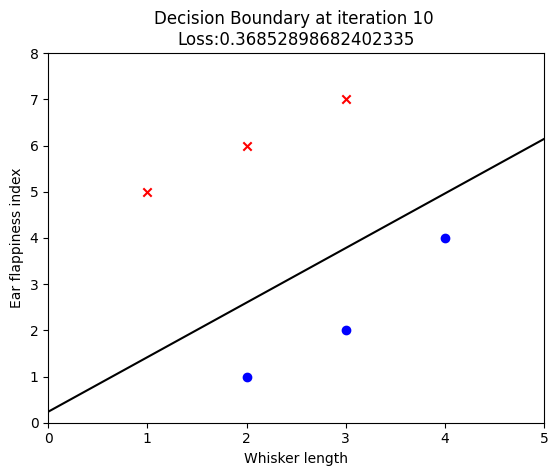

Iteration 10: Theta=[ 0.08979277  0.44735586 -0.37868509], Loss=0.36852898682402335


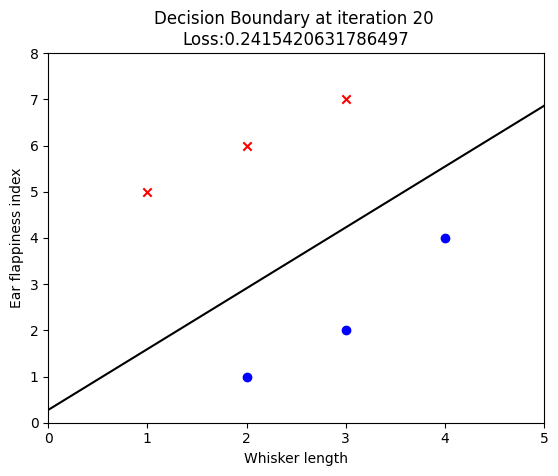

Iteration 20: Theta=[ 0.15409527  0.73473921 -0.55787677], Loss=0.2415420631786497


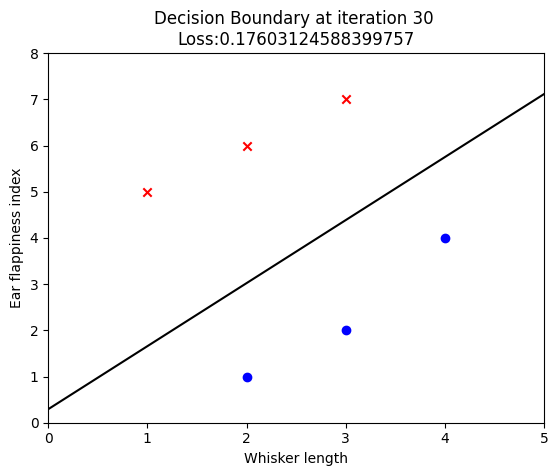

Iteration 30: Theta=[ 0.20129626  0.94131688 -0.68973077], Loss=0.17603124588399757


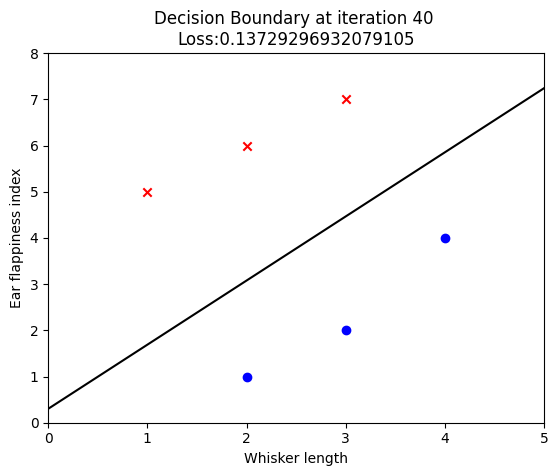

Iteration 40: Theta=[ 0.23824354  1.100363   -0.79256041], Loss=0.13729296932079105


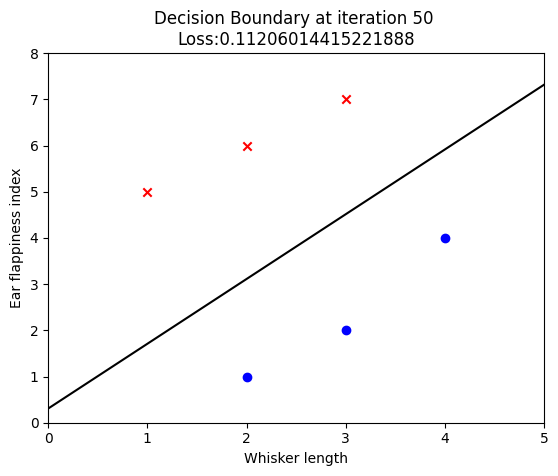

Iteration 50: Theta=[ 0.26848276  1.22883849 -0.87630287], Loss=0.11206014415221888


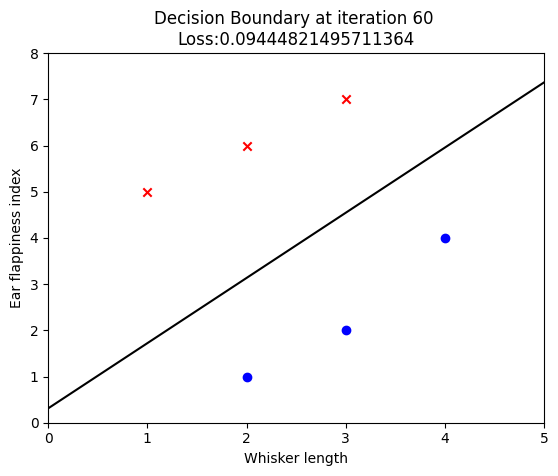

Iteration 60: Theta=[ 0.29403042  1.33623621 -0.94670159], Loss=0.09444821495711364


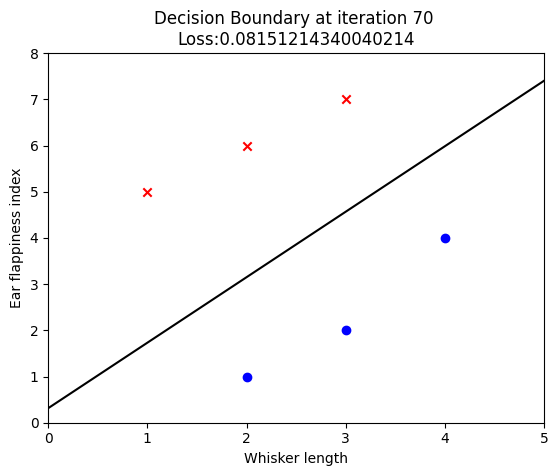

Iteration 70: Theta=[ 0.31612713  1.42831436 -1.00730942], Loss=0.08151214340040214


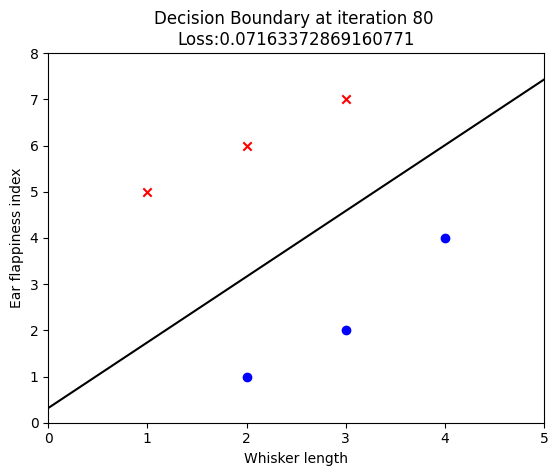

Iteration 80: Theta=[ 0.33558514  1.50879704 -1.06045482], Loss=0.07163372869160771


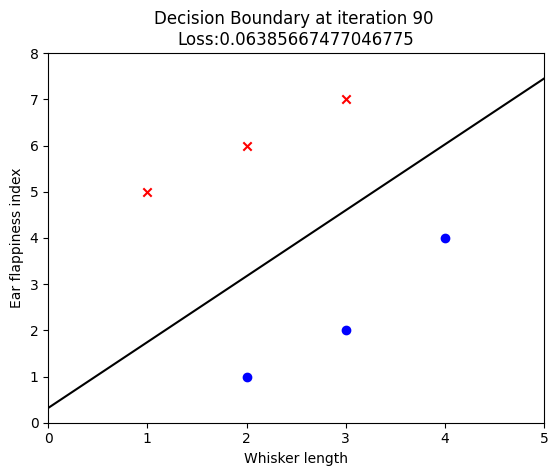

Iteration 90: Theta=[ 0.35296309  1.58021861 -1.10773771], Loss=0.06385667477046775


In [31]:
# Training the Model
weights = logistic_regression(X, y)